<h3> SciPython/Practical_classes_6

<h3> Decision trees

Tree structure components:
- the top vertex (node)
- parent nodes at a higher level with branches connecting child nodes at a lower level
- leaves constituting the final part of the tree, to which appropriate classes are assigned.

We build in such a way that minimize:

- Gini coefficient $I = 1 - \sum_i r_{i}^{2}$

or

- entropy $I = -\sum_i r_i \log_2 r_i$

where $r_i$ - is the proportion of occurrences of $i-$of this class in the current area.

Exercise1: What are the minimum and maximum values of the Gini index? Justify it. How to interpret these situations?

 The Gini index ranges from 0 to 1, with 0 indicating perfect evenness and 1 indicating maximal inequality. To understand why the Gini index takes values from 0 to 1, let's consider the extreme cases. In the case of perfect equality, every individual has a frequency in a given area equal to 1. 1-1**2 gives us a 0. In the opposite case, when there is no equality, every individual is in a different area than given, so the frequency of being in a given area is 0. 1-0 gives us a 1.

In [133]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


iris = datasets.load_iris()
X = iris.data[:, [2,3]]
y = iris.target
np.unique(y)

array([0, 1, 2])

In [134]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=0)

In [135]:
from sklearn.tree import DecisionTreeClassifier

- Entropy criterion

In [138]:
tree = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
tree.fit(X_train, y_train);

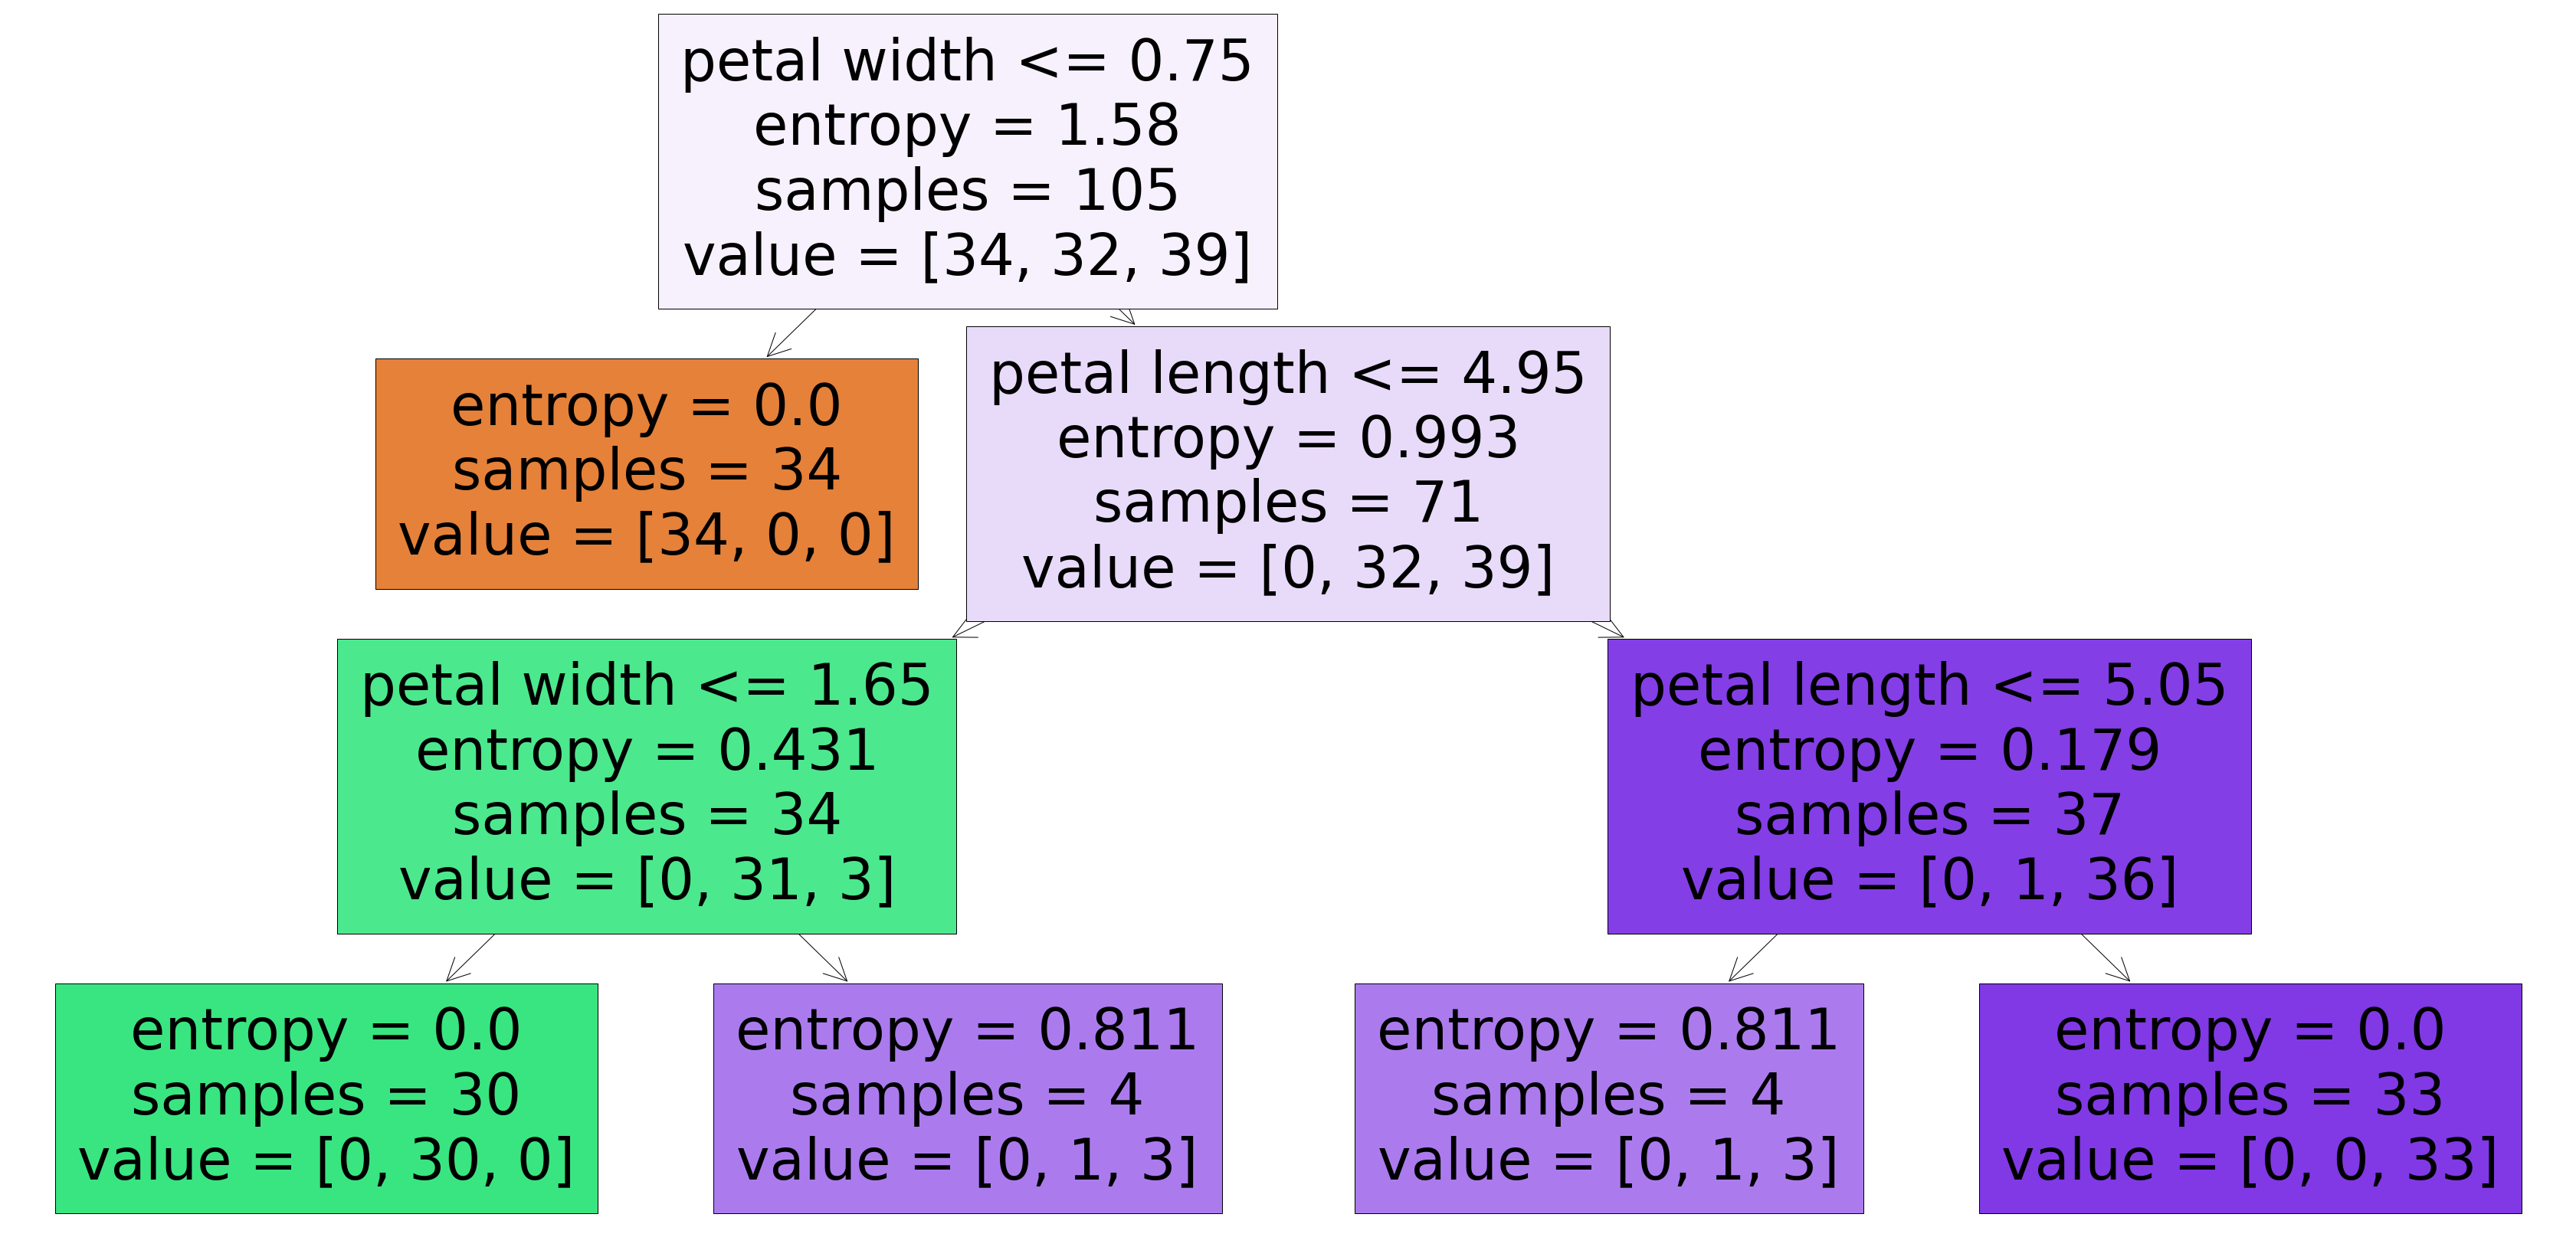

In [5]:
from sklearn.tree import plot_tree
plt.figure(figsize=(60,30))
plot_tree(tree, filled=True, feature_names=['petal length', 'petal width']);

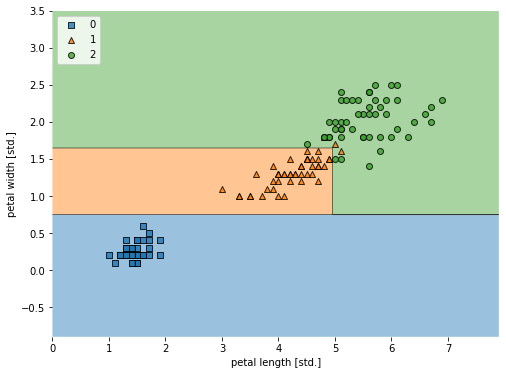

In [6]:
from mlxtend.plotting import plot_decision_regions

plt.figure(figsize=(8, 6))
plot_decision_regions( X=X, y=y, clf=tree)
plt.xlabel('petal length [std.]')
plt.ylabel('petal width [std.]')
plt.legend(loc='upper left')
plt.show()

In [7]:
print(tree.predict([[1.4, 0.2]]))
print()
print(tree.predict([[5.1, 1.8]]))

[0]

[2]


<h4> Exercise2: Justify the entropy value at the top vertex by direct calculation.

In [126]:
import math
I = -((34/105 * math.log2(34/105))+ (32/105 * math.log2(32/105)) + (39/105 * math.log2(39/105)))
I

1.5799176782552726

- Gini index criterion

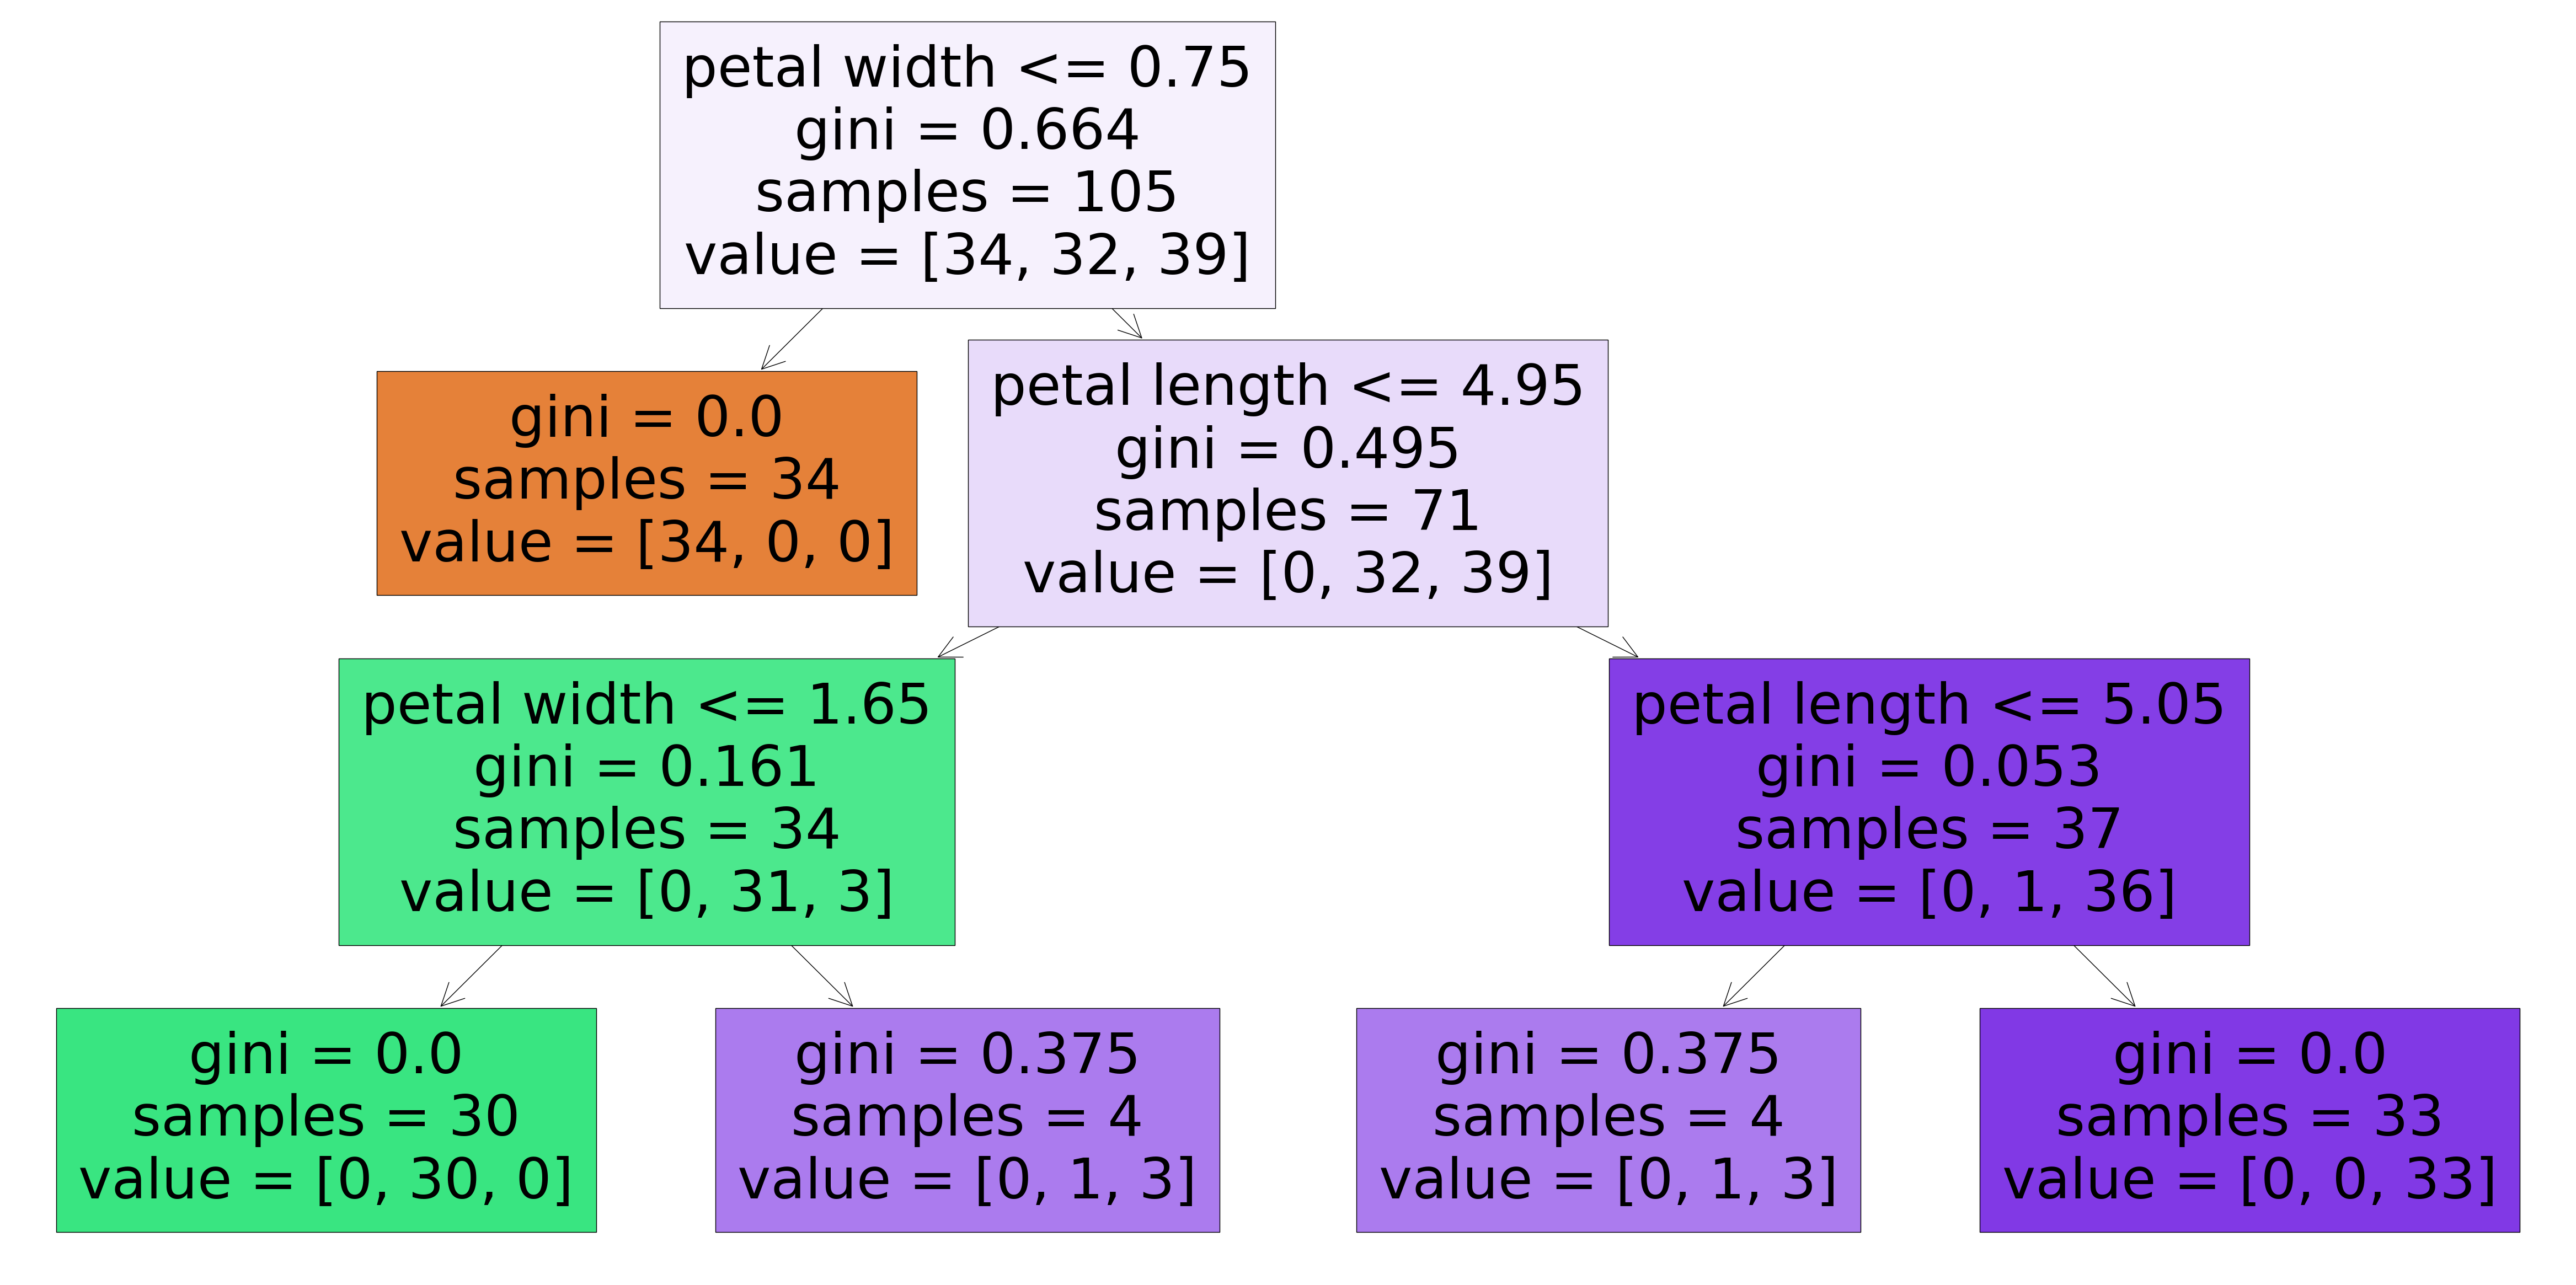

In [140]:
from mlxtend.plotting import plot_decision_regions
from sklearn.tree import plot_tree

tree_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)
tree_gini.fit(X_train, y_train)

plt.figure(figsize=(60,30))
plot_tree(tree_gini, filled=True, feature_names=['petal length', 'petal width']);

<h4> Exercise3: Justify the Gini index value at the top vertex by direct calculation.

In [128]:
G = 1 - ((34/105)**2 + (32/105)**2 + (39/105)**2)
G

0.6643083900226757

Random Forest

A random forest is a variant of a decision tree assembly that implements many randomly generated decision trees at once, which work together to create a final solution with increased accuracy.

- a set of many relatively simple decision trees is used to predict the value of the dependent variable
- each tree predicts the value of the dependent variable based on a random set of independent variables
- prediction of the final value of the model is determined by voting (classification) or averaging (regression task)

The user can specify:
- complexity of component trees
- maximum number of trees
- termination criterion
- others...

Advantages:
- we reduce the risk of overfitting the model
- stability of the model (less likely results are discarded)

It works well on very large data sets, with a huge number of dependent variables, without the need to remove them.


In [141]:
from sklearn.ensemble import RandomForestClassifier

#n_estimators - number of treees; inne np max_depth - maximum depth, to read more: help(RandomForestClassifier)
forest = RandomForestClassifier(criterion='entropy',
                                 n_estimators=10,
                                 random_state=1)
forest.fit(X_train, y_train);

Exercise4: Random forests models usually use a method of modifying training data - bootstrap aggregation. It consists of multiple draws with replacement. If we repeat such a draw $n$ times, we will get $n$ training dataset element in which some of the cases will be repeated. Show that for large $n$ the sample will average $63 \%$ of cases from the original set.

The probability that a particular data point is not selected in any given draw with replacement is $(1-1/n)^n$. Therefore, the probability that it is selected at least once is $1-(1-1/n)^n$.

When we draw with replacement $n$ times, the expected number of distinct data points that are selected is:

$$
N = n\cdot(1-(1-1/n)^n)
$$

We want to find the proportion of cases from the original set that are included in this expected number of distinct data points. Let $N_{orig}$ be the number of distinct data points in the original set. Then, the proportion of cases included is:

$$
\frac{N}{N_{orig}} = \frac{n\cdot(1-(1-1/n)^n)}{N_{orig}}
$$

To show that this approaches 63% for large $n$, we need to take the limit as $n$ approaches infinity:

$$
\lim_{n \to \infty} \frac{n\cdot(1-(1-1/n)^n)}{N_{orig}} = \frac{1}{e}\cdot\frac{1}{N_{orig}} \approx 0.632
$$

where we have used the fact that $\lim_{n \to \infty} (1-1/n)^n = 1/e$.

Therefore, for large $n$, the proportion of cases from the original set included in the expected number of distinct data points is approximately 63%.

<h3> Random Forest for determination of Feature Importance

In [10]:
import pandas as pd

df_wine = pd.read_csv('wine.data')
df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash', 
                   'Alcalinity of ash', 'Magnesium', 'Total phenols', 'Flavanolds', 
                   'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 
                   'Hue', 'OD280/OD315 of diluted wines', 'Proline']

X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)


feat_labels = df_wine.columns[1:]
forest = RandomForestClassifier(n_estimators=10000, random_state=2)
forest.fit(X_train, y_train)
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]

for f in range(X_train.shape[1]): #go through all the features
    print(f"{f+1} {feat_labels[f]} {round(importances[indices[f]],4)}")

1 Alcohol 0.1725
2 Malic acid 0.1571
3 Ash 0.1526
4 Alcalinity of ash 0.1103
5 Magnesium 0.109
6 Total phenols 0.0806
7 Flavanolds 0.0536
8 Nonflavanoid phenols 0.0414
9 Proanthocyanins 0.0348
10 Color intensity 0.0298
11 Hue 0.0254
12 OD280/OD315 of diluted wines 0.0185
13 Proline 0.0144


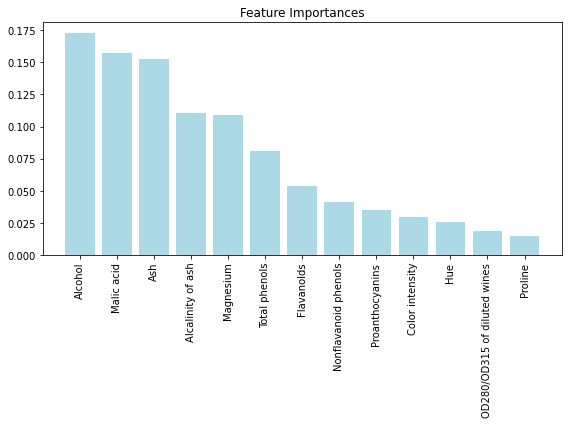

In [12]:
plt.figure(figsize=(8,6))
plt.title('Feature Importances')
plt.bar(range(X_train.shape[1]), importances[indices], color='lightblue', align='center')
plt.xticks(range(X_train.shape[1]), feat_labels, rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()

<h3> Random Forest for Regression

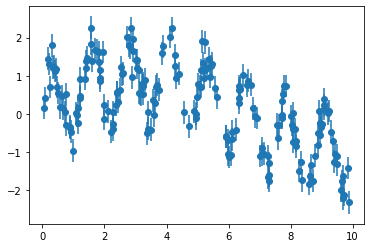

In [13]:
rng = np.random.RandomState(42)
x = 10* rng.rand(200)

def model(x, sigma = 0.3):
    fast_oscillation = np.sin(5*x)
    slow_oscillation = np.sin(0.5*x)
    noise = sigma*rng.randn(len(x))
    
    return slow_oscillation + fast_oscillation + noise

y = model(x)

plt.errorbar(x, y, 0.3, fmt = "o")
plt.show()

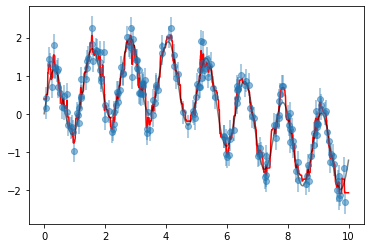

In [14]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor(200)
forest.fit(x[:, np.newaxis], y)

xfit = np.linspace(0, 10, 1000)
yfit = forest.predict(xfit[:, np.newaxis])
ytrue = model(xfit, sigma = 0)

plt.errorbar(x, y, 0.3, fmt = "o", alpha =0.5)
plt.plot(xfit, yfit, "-r")
plt.plot(xfit, ytrue, "-k", alpha = 0.5)
plt.show()

<h3> Random Forest for digits classification

In [15]:
from sklearn.datasets import load_digits

digits = load_digits()
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

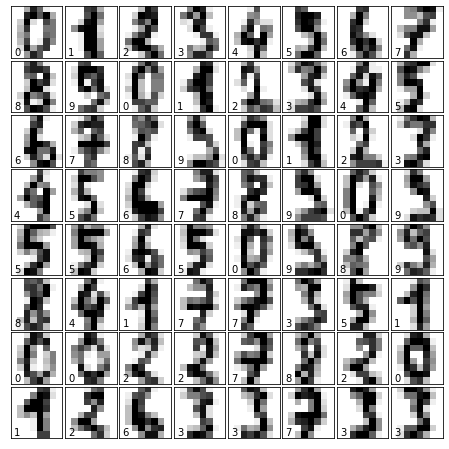

In [16]:
fig = plt.figure(figsize = (6,6))
fig.subplots_adjust(left = 0, right =1, bottom=0, top=1, hspace=0.05,wspace=0.05)

for i in range(64): #every image is 8x8 size
    ax = fig.add_subplot(8, 8, i+1, xticks = [], yticks =[])
    ax.imshow(digits.images[i], cmap = plt.cm.binary, interpolation = "nearest")
    ax.text(0, 7, str(digits.target[i])) #add label

In [17]:
Xtrain, Xtest, ytrain, ytest = train_test_split(digits.data, digits.target, random_state = 0)
model = RandomForestClassifier(n_estimators=1000)
model.fit(Xtrain, ytrain)
ypred = model.predict(Xtest)

In [18]:
from sklearn import metrics
print(metrics.classification_report(ypred, ytest))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        38
           1       1.00      0.96      0.98        45
           2       0.95      1.00      0.98        42
           3       0.98      0.98      0.98        45
           4       0.97      1.00      0.99        37
           5       0.98      0.98      0.98        48
           6       1.00      1.00      1.00        52
           7       1.00      0.96      0.98        50
           8       0.94      0.98      0.96        46
           9       0.98      0.98      0.98        47

    accuracy                           0.98       450
   macro avg       0.98      0.98      0.98       450
weighted avg       0.98      0.98      0.98       450



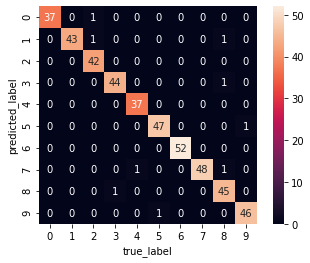

In [19]:
from sklearn.metrics import confusion_matrix
import seaborn as sns


mat = confusion_matrix(ytest, ypred)
sns.heatmap(mat.T, square = True, annot = True, fmt = "d", cbar = True)
plt.xlabel("true_label")
plt.ylabel("predicted_label")
plt.show()

<h4> Exercise5: Consider headings data, which is fake news (1298) and real headlines (1968). One line is one record. Apply decision trees (or Random Forests) and build a classification model. Divide the data into 3 groups: 70% training set, 15% validation set, 15% test set. Test different sets of hyperparameters on a validation set. Comment your results.


I did it in two ways (one more manual and one more automatic).

In [4]:
import pandas as pd
import numpy as np

In [79]:
import pandas as pd
real = pd.read_csv("real.txt", names=["Text"])
fake = pd.read_csv("fake.txt", names=["Text"])
fake["Label"] = 1
real["Label"] = 0
df_merged = pd.concat([fake, real], axis=0)
df_merged = df_merged.sample(frac=1).reset_index(drop=True)  # shuffle data
df_merged.head()

,Text,Label
0,meet the affluent donald trump voters staunch ...,0
1,trump says comey knew he was going to exonerat...,0
2,daughter of jailed vietnamese activist appeals...,0
3,breaking news podesta brothers pedo ring mr tr...,1
4,world leaders react to donald trumps us electi...,0


In [80]:
zeros = df_merged['Label'].value_counts()[0]
ones = df_merged['Label'].value_counts()[1]
zeros,ones

(1968, 1298)

The data is imbalanced -- there is more real headlines than fake.

In [81]:
X = df_merged['Text']
y = df_merged['Label']

In [82]:
from sklearn.model_selection import train_test_split

In [83]:
train_ratio = 0.7
validation_ratio = 0.15
test_ratio = 0.15

# train is now 75% of the entire data set
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=1 - train_ratio)

# test is now 15% of the initial data set
# validation is now 15% of the initial data set
x_validate, x_test, y_validate, y_test = train_test_split(x_test, y_test, test_size=test_ratio/(test_ratio + validation_ratio)) 

In [84]:
is_balanced = y_train.value_counts()
is_balanced

Label
0    1383
1     903
Name: count, dtype: int64

In [85]:
sample_1 = np.random.choice(df_merged['Label']==0, 4080)

In [105]:
train_df = pd.concat([y_train, x_train], axis=1)

In [111]:
class_0_count = train_df['Label'].value_counts()[0]
class_1_count = train_df['Label'].value_counts()[1]

# Calculate the number of samples to balance the data
balanced_count = class_0_count

# Create a balanced DataFrame by randomly sampling from the original DataFrame
df_balanced = pd.concat([
    train_df[train_df['Label'] == 0], # keep all samples with value 0
    train_df[train_df['Label'] == 1].sample(n=balanced_count, replace=True) # randomly sample n samples with value 1
])

# Verify the new class distribution
print(df_balanced['Label'].value_counts())

Label
0    1383
1    1383
Name: count, dtype: int64


In [90]:
x_train_bal = df_balanced['Text']
y_train_bal = df_balanced['Label']

In [113]:
x_train_bal

1588          donald trump driving a wedge with diplomacy
3261                       trump supporters heading to dc
2359    trump promises quick decision on new fbi director
333              trump changes course on ripping up nafta
3081    donald trump hillary clinton grievances republ...
                              ...                        
1837    you wont believe the hilarious reason we haven...
1490    rigged to deny trump are they stealing these s...
2470    jordanian bedouin poet proposes to tiffany tru...
1815    donald trump and his supporters are fighting a...
1366    life the power of unity this trump supporter a...
Name: Text, Length: 2766, dtype: object

First method:

In [92]:
from sklearn.feature_extraction.text import TfidfVectorizer #method TF-IDF is an example how to convert the text into numbers
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

model1 = make_pipeline(TfidfVectorizer(), RandomForestClassifier(n_estimators=1000, max_depth=3, random_state=2)) #we make a pipeline, 1. Text->numbers, 2. NB model
model2 = make_pipeline(TfidfVectorizer(), RandomForestClassifier(n_estimators=100, max_depth=3, random_state=2))
model3 = make_pipeline(TfidfVectorizer(), RandomForestClassifier(n_estimators=10, max_depth=3, random_state=2))
model4 = make_pipeline(TfidfVectorizer(), RandomForestClassifier(n_estimators=1000, max_depth=4, random_state=2))
model5 = make_pipeline(TfidfVectorizer(), RandomForestClassifier(n_estimators=1000, max_depth=5, random_state=2))
model6 = make_pipeline(TfidfVectorizer(), RandomForestClassifier(n_estimators=1000, max_depth=6, random_state=2))
model7 = make_pipeline(TfidfVectorizer(), RandomForestClassifier(n_estimators=1000, max_depth=7, random_state=2))
model8 = make_pipeline(TfidfVectorizer(), RandomForestClassifier(n_estimators=1000, max_depth=1, random_state=2))

In [94]:
models = (model1, model2, model3, model4, model5, model6, model7, model8)
for model in models:
    model.fit(x_train_bal, y_train_bal)
    categories_predicted = model.predict(x_validate)
    print(classification_report(y_validate, model.predict(x_validate)))

              precision    recall  f1-score   support

           0       0.80      0.91      0.85       293
           1       0.84      0.66      0.74       197

    accuracy                           0.81       490
   macro avg       0.82      0.79      0.80       490
weighted avg       0.82      0.81      0.81       490

              precision    recall  f1-score   support

           0       0.78      0.93      0.85       293
           1       0.85      0.61      0.71       197

    accuracy                           0.80       490
   macro avg       0.82      0.77      0.78       490
weighted avg       0.81      0.80      0.79       490

              precision    recall  f1-score   support

           0       0.70      0.75      0.73       293
           1       0.59      0.53      0.56       197

    accuracy                           0.66       490
   macro avg       0.65      0.64      0.64       490
weighted avg       0.66      0.66      0.66       490

              preci

In this case it turned out that the best hyperparameters in that case were: n_estimators=1000, max_depth=4, random_state=2. We can see that the bigger number of estimators gives us highest f1 scores. max depth isn't as important in an overall performance.

In [95]:
print(classification_report(y_test, model4.predict(x_test)))

              precision    recall  f1-score   support

           0       0.81      0.90      0.85       292
           1       0.82      0.70      0.75       198

    accuracy                           0.82       490
   macro avg       0.82      0.80      0.80       490
weighted avg       0.82      0.82      0.81       490



Second method:

In [121]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [122]:
from sklearn.feature_extraction.text import TfidfVectorizer #method TF-IDF is an example how to convert the text into numbers
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [123]:
vectorizer = TfidfVectorizer()  
X_train = vectorizer.fit_transform(x_train_bal)
X_test_tf = vectorizer.fit_transform(x_test)
X_validate_tf = vectorizer.fit_transform(x_validate)


In [124]:
grid_search.fit(X_train, y_train_bal)

Fitting 3 folds for each of 288 candidates, totalling 864 fits
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   1.4s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   1.7s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   2.4s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=200; total time=   3.2s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=200; total time=   3.2s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=200; total time=   3.4s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=300; total time=   4.3s
[CV] E

GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [80, 90, 100, 110],
                         'max_features': [2, 3], 'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [8, 10, 12],
                         'n_estimators': [100, 200, 300, 1000]},
             verbose=2)

In [125]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 80,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 10,
 'n_estimators': 1000}

In [126]:
best_grid = grid_search.best_estimator_
best_grid

RandomForestClassifier(max_depth=80, max_features=3, min_samples_leaf=3,
                       min_samples_split=10, n_estimators=1000)

In [130]:
best_model = make_pipeline(TfidfVectorizer(), RandomForestClassifier(bootstrap = True,
 max_depth = 80,
 max_features = 3,
 min_samples_leaf = 3,
 min_samples_split = 10,
 n_estimators = 1000))

I used validation set only for the purpose of this excercise, because GridSearchCV creates its own validation set. It uses k-fold cross-validation to split the dsta into k-subsets.

In [133]:
best_model.fit(x_train_bal, y_train_bal)
categories_predicted = best_model.predict(x_validate)
print(classification_report(y_validate, best_model.predict(x_validate)))

              precision    recall  f1-score   support

           0       0.80      0.91      0.85       293
           1       0.84      0.65      0.73       197

    accuracy                           0.81       490
   macro avg       0.82      0.78      0.79       490
weighted avg       0.81      0.81      0.80       490



In [135]:
print(classification_report(y_test, best_model.predict(x_test)))

              precision    recall  f1-score   support

           0       0.80      0.89      0.84       292
           1       0.80      0.68      0.74       198

    accuracy                           0.80       490
   macro avg       0.80      0.78      0.79       490
weighted avg       0.80      0.80      0.80       490



As we can see, in both methods accuracy is very similar (about 80%).